## Build Models To Compare Features: Reduced Set Of Features

### Read In Data

In [1]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('./train_features_reduced.csv')
train_labels = pd.read_csv('./train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_tr,Cabin_ind,Title
0,2,1,62.0,0,1.600434,0,11
1,3,1,8.0,5,1.962697,0,7
2,3,1,32.0,0,2.240801,0,11
3,3,0,20.0,1,1.579307,0,8
4,2,0,28.0,0,1.670278,0,8


<AxesSubplot:>

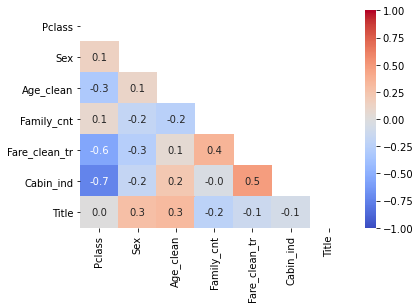

In [2]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### GridSearchCV

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [4]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 8}

0.789 (+/-0.13) for {'max_depth': 2, 'n_estimators': 8}
0.775 (+/-0.136) for {'max_depth': 2, 'n_estimators': 16}
0.794 (+/-0.097) for {'max_depth': 2, 'n_estimators': 32}
0.796 (+/-0.132) for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.109) for {'max_depth': 2, 'n_estimators': 128}
0.789 (+/-0.12) for {'max_depth': 2, 'n_estimators': 256}
0.79 (+/-0.118) for {'max_depth': 2, 'n_estimators': 512}
0.818 (+/-0.085) for {'max_depth': 4, 'n_estimators': 8}
0.82 (+/-0.106) for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.104) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.097) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.088) for {'max_depth': 4, 'n_estimators': 128}
0.818 (+/-0.1) for {'max_depth': 4, 'n_estimators': 256}
0.817 (+/-0.105) for {'max_depth': 4, 'n_estimators': 512}
0.822 (+/-0.064) for {'max_depth': 8, 'n_estimators': 8}
0.813 (+/-0.078) for {'max_depth': 8, 'n_estimators': 16}
0.809 (+/-0.063) for {'max_d

### Feature Importance

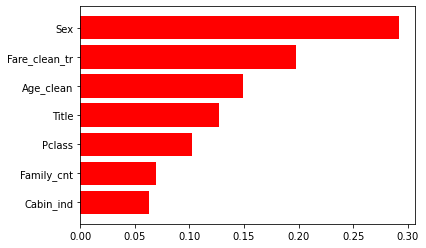

In [5]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [6]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, './mdl_reduced_features.pkl')

['./mdl_reduced_features.pkl']